In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pathlib import Path

datapath = Path('/home/jseia/Desktop/thesis/data/')
base_path = Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/nnunetv2')
os.environ['nnUNet_raw'] = str(base_path/'nnUNet_raw')
os.environ['nnUNet_preprocessed'] = str(base_path/'preprocessed')
os.environ['nnUNet_results'] = str(base_path/'nnUNet_trained_models')

projector_wo_tbi = NetProjectorCAM(
    Path('/home/jseia/Desktop/thesis/code/nnUNet_ais/SSL/cfg_files/ssl_pretraining_first_try/config_not_tbi_1d.yml'),
    Path('/home/jseia/Desktop/thesis/code/stroke-seg/experiments/SSL/non_tbi/non_tbi_1d/checkpoint.pth'),
)

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

Using pretrained enconder: True
When initializing - The model has 100.0% of trainable parameters 


In [2]:
from captum.attr import IntegratedGradients # LayerGradCam, LayerIntegratedGradients, FeatureAblation, LayerActivation, LayerAttribution

In [3]:
# lgc = LayerGradCam(projector_wo_tbi.forward, projector_wo_tbi.projector.backbone.net.stages[0][0].convs[1].all_modules[0])
# bla = LayerIntegratedGradients(projector_wo_tbi.forward, projector_wo_tbi.projector.backbone.net.stages[0][0].convs[1].all_modules[0])
sal = IntegratedGradients(projector_wo_tbi.forward)

In [1]:
import numpy as np
img = np.load('/home/jseia/Desktop/thesis/code/nnUNet_ais/nnunetv2/preprocessed/Dataset026_AIS/nnUNetPlansSSL_3d_fullres/1eUQ847.npy')
print(img.shape)
img = np.expand_dims(img, axis=0)
print(img.shape)
# img = torch.tensor(img, device='cuda')
# # la = lgc.attribute(img)
# # b = bla.attribute(img)
# s =sal.attribute(img)

(1, 152, 169, 146)
(1, 1, 152, 169, 146)


In [ ]:
# la.shape, 
s.shape

torch.Size([1, 1, 152, 169, 146])

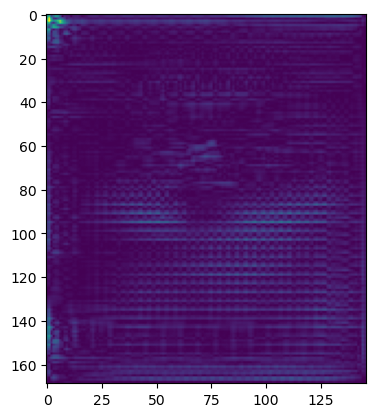

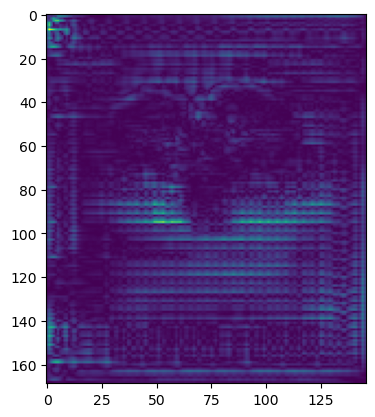

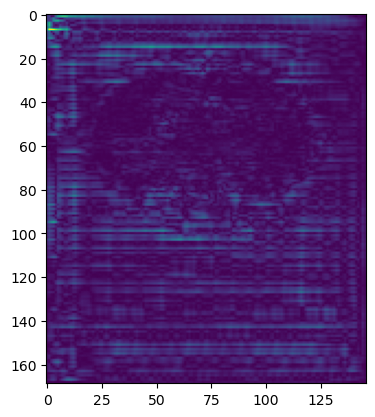

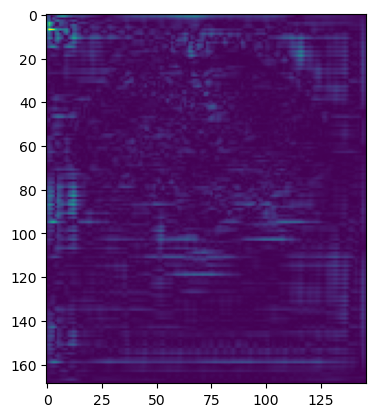

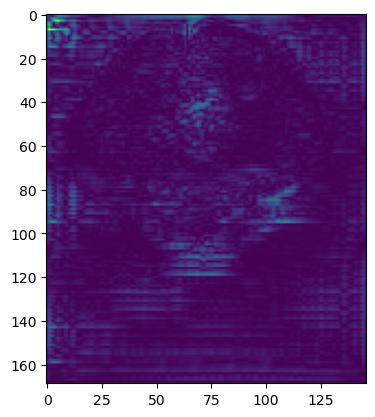

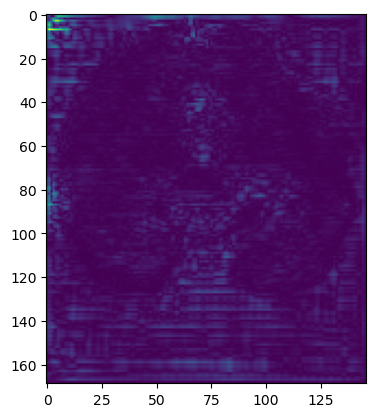

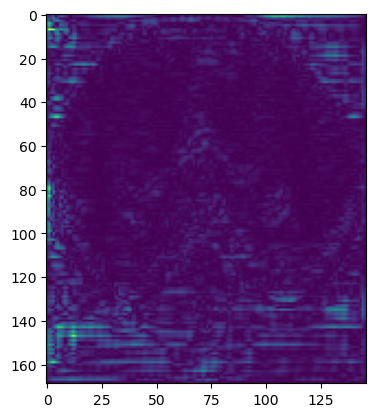

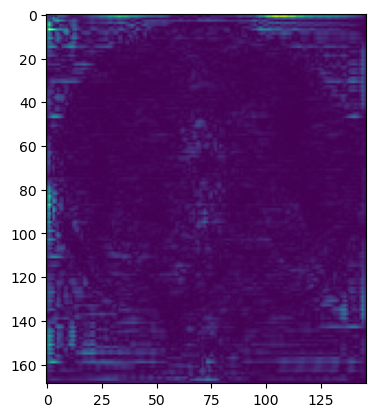

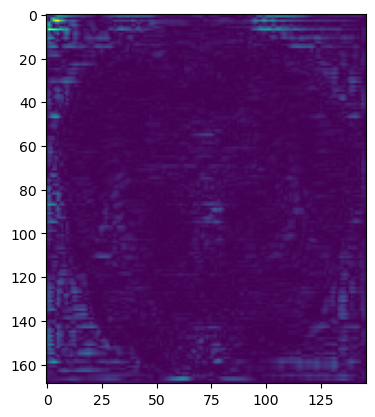

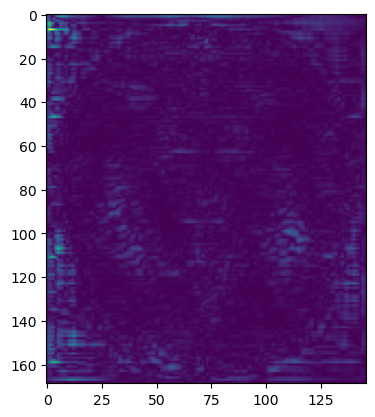

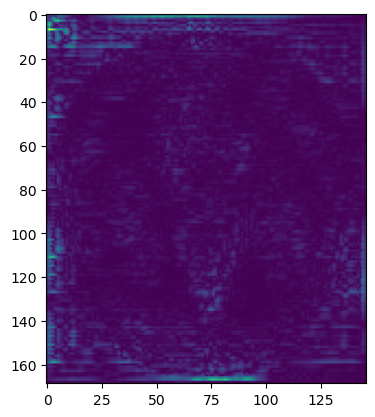

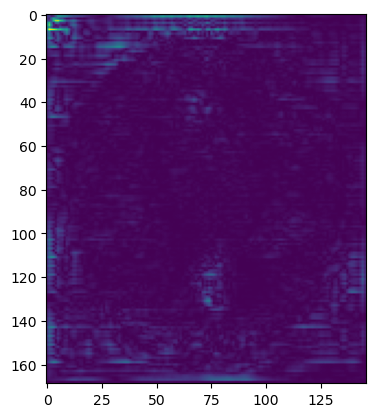

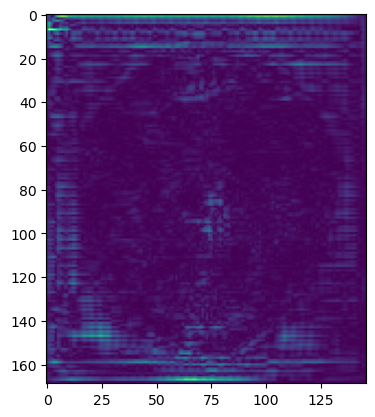

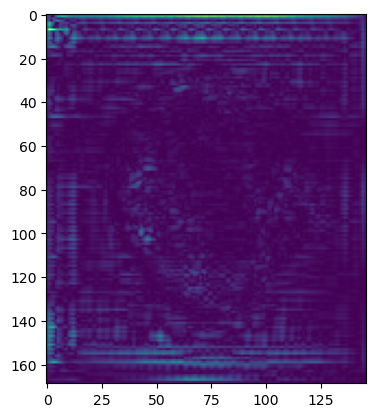

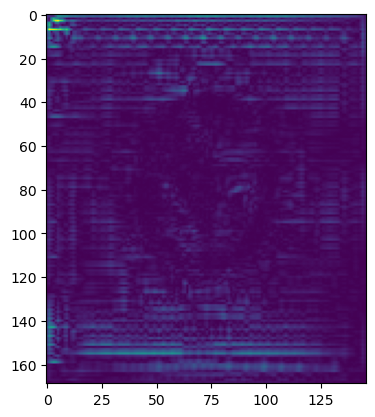

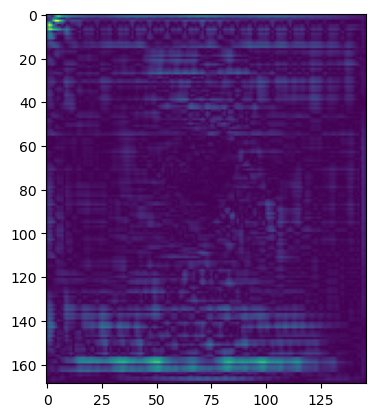

In [ ]:
%matplotlib inline
# TODO make intensities relatives
for i in range(0, 152, 10):
    plt.figure()
    plt.imshow(s[0, 0, i, :, :].detach().cpu().numpy())